

# Multiple Linear Regression Inference

## Download

- [Slides](http://www.stanford.edu/class/stats191/Chapter10/Multiple_Linear_Regression_Inference.html)

- RStudio: [RMarkdown](http://www.stanford.edu/class/stats191/Chapter10/Multiple_Linear_Regression_Inference.Rmd),[Quarto](http://www.stanford.edu/class/stats191/Chapter10/Multiple_Linear_Regression_Inference.qmd)    
    
- [Jupyter](https://nbviewer.org/urls/www.stanford.edu/class/stats191/Chapter10/Multiple_Linear_Regression_Inference.ipynb)    
    


## Outline

- Case studies:

    A. Galileo's falling bodies

    B.  Energy costs of echolocation

## Energy costs of echolocation

In [1]:
url = 'https://raw.githubusercontent.com/StanfordStatistics/stats191-data/main/Sleuth3/bats_energy.csv'
bats = read.table(url, sep=',', header=TRUE)
bats

Mass  Type                   Energy
1  779.0 non-echolocating bats  43.70 
2  628.0 non-echolocating bats  34.80 
3  258.0 non-echolocating bats  23.30 
4  315.0 non-echolocating bats  22.40 
5   24.3 non-echolocating birds  2.46 
6   35.0 non-echolocating birds  3.93 
7   72.8 non-echolocating birds  9.15 
8  120.0 non-echolocating birds 13.80 
9  213.0 non-echolocating birds 14.60 
10 275.0 non-echolocating birds 22.80 
11 370.0 non-echolocating birds 26.20 
12 384.0 non-echolocating birds 25.90 
13 442.0 non-echolocating birds 29.50 
14 412.0 non-echolocating birds 43.70 
15 330.0 non-echolocating birds 34.00 
16 480.0 non-echolocating birds 27.80 
17  93.0 echolocating bats       8.83 
18   8.0 echolocating bats       1.35 
19   6.7 echolocating bats       1.12 
20   7.7 echolocating bats       1.02

## Fitting a model

In [2]:
bats.lm = lm(Energy ~ Type + Mass, data=bats)
summary(bats.lm)


Call:
lm(formula = Energy ~ Type + Mass, data = bats)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8198 -3.6711 -0.9508  1.1499 13.9899 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.421257   2.660684   0.534    0.601    
Typenon-echolocating bats  1.168512   5.145112   0.227    0.823    
Typenon-echolocating birds 4.600720   3.537113   1.301    0.212    
Mass                       0.057495   0.007557   7.608 1.06e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.303 on 16 degrees of freedom
Multiple R-squared:  0.8791,	Adjusted R-squared:  0.8565 
F-statistic: 38.79 on 3 and 16 DF,  p-value: 1.437e-07


## Other models

In [3]:
simpler.lm = lm(Energy ~ Type, data=bats)
coef(simpler.lm)

(Intercept)  Typenon-echolocating bats 
                   3.08000                   27.97000 
Typenon-echolocating birds 
                  18.07333

In [4]:
complex.lm = lm(Energy ~ Type + Mass + Type:Mass, data=bats)
coef(complex.lm)

(Intercept)       Typenon-echolocating bats 
                     0.49398304                     10.73340067 
     Typenon-echolocating birds                            Mass 
                     2.82275855                      0.08963664 
 Typenon-echolocating bats:Mass Typenon-echolocating birds:Mass 
                    -0.04959095                     -0.02186199

## Case study B: Galileo's data

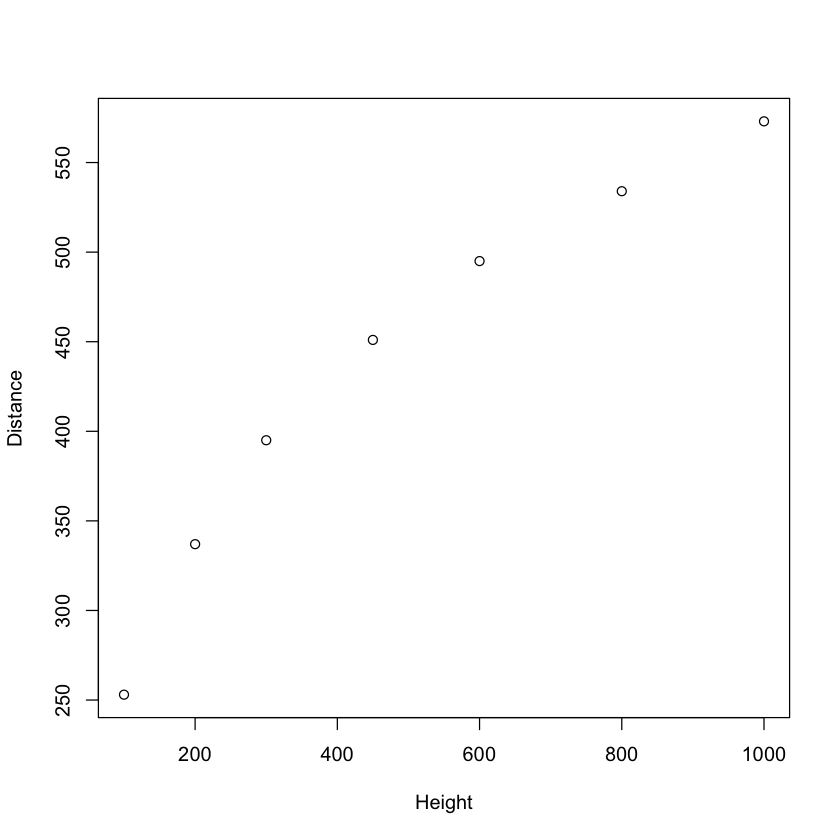

In [5]:
url = 'https://raw.githubusercontent.com/StanfordStatistics/stats191-data/main/Sleuth3/galileo.csv'
galileo = read.table(url, sep=',', header=TRUE)
with(galileo, plot(Height, Distance))

---

- Galileo fit a quadratic model to his data

- Note the notation `I(Height^2)` -- without `I` a quadratic term will not be added...

In [6]:
galileo1.lm = lm(Distance ~ Height + I(Height^2), data=galileo)
summary(galileo1.lm)


Call:
lm(formula = Distance ~ Height + I(Height^2), data = galileo)

Residuals:
      1       2       3       4       5       6       7 
-14.308   9.170  13.523   1.940  -6.177 -12.607   8.458 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.999e+02  1.676e+01  11.928 0.000283 ***
Height       7.083e-01  7.482e-02   9.467 0.000695 ***
I(Height^2) -3.437e-04  6.678e-05  -5.147 0.006760 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.64 on 4 degrees of freedom
Multiple R-squared:  0.9903,	Adjusted R-squared:  0.9855 
F-statistic:   205 on 2 and 4 DF,  p-value: 9.333e-05


---

- A different way to fit the model

In [7]:
galileo2.lm = lm(Distance ~ poly(Height, 2), data=galileo)
summary(galileo2.lm)


Call:
lm(formula = Distance ~ poly(Height, 2), data = galileo)

Residuals:
      1       2       3       4       5       6       7 
-14.308   9.170  13.523   1.940  -6.177 -12.607   8.458 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       434.000      5.155  84.190 1.19e-07 ***
poly(Height, 2)1  267.116     13.639  19.585 4.01e-05 ***
poly(Height, 2)2  -70.194     13.639  -5.147  0.00676 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.64 on 4 degrees of freedom
Multiple R-squared:  0.9903,	Adjusted R-squared:  0.9855 
F-statistic:   205 on 2 and 4 DF,  p-value: 9.333e-05


---

- Predictions / CIs are the same

In [8]:
predict(galileo1.lm, list(Height=250), interval='confidence')
predict(galileo2.lm, list(Height=250), interval='confidence')

fit      lwr      upr     
1 355.5126 337.1189 373.9063

fit      lwr      upr     
1 355.5126 337.1189 373.9063

---

- Tests of quadratic effect are the same

In [9]:
galileo0.lm = lm(Distance ~ Height, data=galileo)
anova(galileo0.lm, galileo1.lm)
anova(galileo0.lm, galileo2.lm)

Res.Df RSS       Df Sum of Sq F        Pr(>F)     
1 5      5671.2063 NA       NA        NA          NA
2 4       744.0781  1 4927.128  26.48716 0.006760485

Res.Df RSS       Df Sum of Sq F        Pr(>F)     
1 5      5671.2063 NA       NA        NA          NA
2 4       744.0781  1 4927.128  26.48716 0.006760485

## Confidence intervals 

-   Suppose we want a $(1-\alpha)\cdot 100\%$ CI for
    $\sum_{j=0}^p a_j\beta_j$.

-   Just as in simple linear regression:

    $$\sum_{j=0}^p a_j \widehat{\beta}_j \pm t_{1-\alpha/2, n-p-1} \cdot SE\left(\sum_{j=0}^p a_j\widehat{\beta}_j\right).$$


In [10]:
confint(bats.lm, level=0.90)
predict(bats.lm, list(Mass=300, Type="non-echolocating bats"), interval='confidence')

5 %        95 %       
(Intercept)                -3.2239868  6.06650127
Typenon-echolocating bats  -7.8142562 10.15127927
Typenon-echolocating birds -1.5746672 10.77610686
Mass                        0.0443021  0.07068873

fit      lwr      upr     
1 19.83839 13.40731 26.26948

## $T$-statistics revisited

Of course, these confidence intervals are based on the standard ingredients of a
$T$-statistic.

-   Suppose we want to test

\begin{equation}
H_0:\sum_{j=0}^p a_j\beta_j= h.
\end{equation}

---

- As in simple linear regression, it is based on

\begin{equation}
T = \frac{\sum_{j=0}^p a_j \widehat{\beta}_j - h}{SE(\sum_{j=0}^p a_j \widehat{\beta}_j)}.
\end{equation}

-   If $H_0$ is true, then $T \sim t_{n-p-1}$, so we reject $H_0$ at
    level $\alpha$ if

\begin{equation}
\begin{aligned}
|T| &\geq t_{1-\alpha/2,n-p-1}, \qquad \text{ OR} \\
p-\text{value} &= {\tt 2*(1-pt(|T|, n-p-1))} \leq \alpha.
\end{aligned}
\end{equation}


---

Let's do a quick calculation to remind ourselves the relationships of the variables
in the table above.


In [11]:
T_Mass = 0.057495 / 0.007557
P_Mass = 2 * (1 - pt(abs(T_Mass), 16))
c(T_Mass, P_Mass)

[1] 7.608178e+00 1.057248e-06

In [12]:
summary(bats.lm)$coef

Estimate   Std. Error  t value  Pr(>|t|)    
(Intercept)                1.42125723 2.660683583 0.534170 6.005680e-01
Typenon-echolocating bats  1.16851155 5.145112379 0.227111 8.232139e-01
Typenon-echolocating birds 4.60071984 3.537112527 1.300699 2.117840e-01
Mass                       0.05749542 0.007556812 7.608422 1.056817e-06

## One-sided tests

-   Suppose, instead, we wanted to test the one-sided hypothesis

\begin{equation}
H_0:\sum_{j=0}^p a_j\beta_j \leq  h, \  \text{vs.} \ H_a: \sum_{j=0}^p a_j\beta_j > 
 h
\end{equation}

-   If $H_0$ is true, then $T$ is no longer exactly $t_{n-p-1}$ but we still have

\begin{equation}
\mathbb{P}\left(T > t_{1-\alpha, n-p-1}\right) \leq 1 - \alpha
\end{equation}

---

- We reject $H_0$ at level $\alpha$ if

\begin{equation}
\begin{aligned}
T &\geq t_{1-\alpha,n-p-1}, \qquad \text{ OR} \\
p-\text{value} &= {\tt (1-pt(T, n-p-1))} \leq \alpha.
\end{aligned}
\end{equation}
       
## Standard error of $\sum_{j=0}^p a_j \widehat{\beta}_j$

- In order to form these $T$ statistics, we need the $SE$ of our estimate $\sum_{j=0}^p a_j \widehat{\beta}_j$.

-   Based on matrix approach to regression

\begin{equation}
SE\left(\sum_{j=0}^p a_j\widehat{\beta}_j \right) = SE\left(a^T\widehat{\beta} \right) =
\sqrt{\widehat{\sigma}^2 \cdot a^T (X^TX)^{-1} a}.
\end{equation}

---

-   Don’t worry too much about specific implementation – for much of the effects
    we want `R` will do this for you in
    general.


In [13]:
X = model.matrix(bats.lm)
sigma.hat = sqrt(sum(resid(bats.lm)^2 / 16))
cov.beta = sigma.hat^2 * solve(t(X) %*% X)
cov.beta

(Intercept)  Typenon-echolocating bats
(Intercept)                 7.079237129 -6.26372902              
Typenon-echolocating bats  -6.263729023 26.47218139              
Typenon-echolocating birds -6.645658653 13.26936531              
Mass                       -0.001647491 -0.02661969              
                           Typenon-echolocating birds Mass         
(Intercept)                -6.64565865                -1.647491e-03
Typenon-echolocating bats  13.26936531                -2.661969e-02
Typenon-echolocating birds 12.51116503                -1.338123e-02
Mass                       -0.01338123                 5.710541e-05

In [14]:
vcov(bats.lm)

(Intercept)  Typenon-echolocating bats
(Intercept)                 7.079237129 -6.26372902              
Typenon-echolocating bats  -6.263729023 26.47218139              
Typenon-echolocating birds -6.645658653 13.26936531              
Mass                       -0.001647491 -0.02661969              
                           Typenon-echolocating birds Mass         
(Intercept)                -6.64565865                -1.647491e-03
Typenon-echolocating bats  13.26936531                -2.661969e-02
Typenon-echolocating birds 12.51116503                -1.338123e-02
Mass                       -0.01338123                 5.710541e-05

---

The standard errors of each coefficient estimate are the square root of the diagonal entries. They appear as the
`Std. Error` column in the `coef` table.


In [15]:
sqrt(diag(vcov(bats.lm)))
summary(bats.lm)$coef[,2]

(Intercept)  Typenon-echolocating bats 
               2.660683583                5.145112379 
Typenon-echolocating birds                       Mass 
               3.537112527                0.007556812

(Intercept)  Typenon-echolocating bats 
               2.660683583                5.145112379 
Typenon-echolocating birds                       Mass 
               3.537112527                0.007556812

## Prediction / forecasting interval

-   Basically identical to simple linear regression.

-   Prediction interval at $X_{1,new}, \dots, X_{p,new}$:

\begin{equation}
\begin{aligned}
\widehat{\beta}_0 + \sum_{j=1}^p X_{j,new} \widehat{\beta}_j\pm t_{1-\alpha/2, n-p-1} \times & \\
\qquad \sqrt{\widehat{\sigma}^2 + SE\left(\widehat{\beta}_0 + \sum_{j=1}^p X_{j,new}\widehat{\beta}_j\right)^2} &
\end{aligned}
\end{equation}

## Questions about many (combinations) of $\beta_j$’s

-   In multiple regression we can ask more complicated questions than in
    simple regression.

-   For instance, in `bats.lm` we could ask whether `Type` is important at all?

-   These questions can be answered answered by $F$-statistics.


## Dropping one or more variables

-   Suppose we wanted to test the above hypothesis
    Formally, the null hypothesis is:

$$
H_0: \beta_1=\beta_2=0
$$

-    The alternative is

$$
H_a = \text{one of $ \beta_1,\beta_2$ is not 0}. 
$$

---

-   This test is an $F$-test based on two models

\begin{equation}
\begin{aligned}
\text{Full:}  & \qquad
\texttt{Energy $\widetilde{}$ Type + Mass} \\
\text{Reduced:} & \qquad \texttt{Energy $\widetilde{}$ Mass} \\
\end{aligned}
\end{equation}


## $SSE$ of a model

-   In the graphic, a "model", ${\cal M}$ is a subspace of
    $\mathbb{R}^n$ (e.g. column space of ${X}$).

-   Least squares fit = projection onto the subspace of ${\cal M}$,
    yielding predicted values $\widehat{Y}_{{\cal M}}$

-   Error sum of squares:

$$SSE({\cal M}) = \|Y - \widehat{Y}_{{\cal M}}\|^2.$$

## Least squares for $F$ statistic

![](http://www.stanford.edu/class/stats191/Chapter9/figs/axes_SSR_multiple.png){height=400 fig-align="center"}

- Fits of a full and reduced model $\hat{Y}_F$ and $\hat{Y}_R$

- The difference $\hat{Y}_F-\hat{Y}_R$.

## Right triangle for $F$ statistic

![](http://www.stanford.edu/class/stats191/Chapter8/figs/right_triangle_reduced.png){height=300 fig-align="center"}

- Sides of the triangle: $SSE_R-SSE_F$, $SSE_F$

- Hypotenuse: $SSE_R$

---

### Right triangle with full and reduced model: degrees of freedom

![](http://www.stanford.edu/class/stats191/Chapter8/figs/right_triangle_reduced_df.png){height=300 fig-align="center"}

- Sides of the triangle: $df_R-df_F$, $df_F$

- Hypotenuse: $df_R$



## $F$-statistic for $H_0:\beta_{1}=\beta_{2}=0$

-   We compute the $F$ statistic the same to compare any two (nested) models

\begin{equation}
\begin{aligned}
F &=\frac{\frac{SSE(R) - SSE(F)}{2}}{\frac{SSE(F)}{n-1-p}} \\
& \sim F_{2, 16}       \qquad   (\text{if $H_0$ is true})
\end{aligned}
\end{equation}

---

-   Reject $H_0$ at level $\alpha$ if $F > F_{1-\alpha, 2, 16}$.


In [16]:
reduced.lm = lm(Energy ~ Mass, data=bats)
anova(reduced.lm, bats.lm)

Res.Df RSS      Df Sum of Sq F        Pr(>F)   
1 18     528.8563 NA       NA        NA        NA
2 16     450.0292  2 78.82704  1.401278 0.2749315

## General $F$-tests

-   Given two models $R \subset F$ (i.e. $R$ is a subspace of $F$), we
    can consider testing

\begin{equation}
H_0: \text{$R$ is adequate (i.e. $\mathbb{E}(Y) \in R$)}
\end{equation}

\begin{equation}
H_a: \text{$F$ is adequate (i.e. $\mathbb{E}(Y) \in F$)}
\end{equation}
    
- The least squares picture has models $X_R$ and $X_F=X_R+(X_F \perp X_R) \dots$

---

- The test statistic is

\begin{equation}
F = \frac{(SSE(R) - SSE(F)) / (df_R - df_F)}{SSE(F)/df_F}
\end{equation}

-   If $H_0$ is true, $F \sim F_{df_R-df_F, df_F}$ so we reject $H_0$ at
    level $\alpha$ if $F > F_{1-\alpha, df_R-df_F, df_F}$.


## Constraining coefficients

- Suppose we wanted to test $H_0$: the line for non-echolocating
bats has the same intercept as the line for non-echolocating birds.

- Can be expressed as $H_0:\beta_1=\beta_2$ in `bats.lm`.

---

### Strategy 1: fit a model in which this is *forced* to be true

In [17]:
null_group = rep(1, nrow(bats))
null_group[bats$Type=="echolocating bats"] = 2
bats$null_group = factor(null_group)
null_bats.lm = lm(Energy ~ Mass + null_group, data=bats)
anova(null_bats.lm, bats.lm)

Res.Df RSS      Df Sum of Sq F         Pr(>F)  
1 17     476.6541 NA       NA         NA       NA
2 16     450.0292  1 26.62481  0.9465984 0.345067

---

### Strategy 2: a $T$-statistic

- Hypothesis is $H_0:\beta_1-\beta_2=0$

- This method doesn't require fitting the special model `null_bats.lm`!

- Can be generalized to $F$ tests (hypotheses involving multiple contrasts of $\beta$)

In [18]:
A = c(0,1,-1,0)
var_diff = sum(A * vcov(bats.lm) %*% A)
se_diff = sqrt(var_diff)
T = sum(coef(bats.lm) * A) / se_diff
T^2

[1] 0.9465984

## Math aside: general linear hypothesis

- Suppose we want to test the null hypothesis

\begin{equation}
H_0:C_{q \times (p+1)}\beta_{(p+1) \times 1} = h
\end{equation}

- Alternative is

\begin{equation}
H_a :C_{q \times (p+1)}\beta_{(p+1) \times 1} \neq h.
\end{equation}

## Math aside: $F$ statistic in general linear hypothesis

- Numerator

$$
(C\hat{\beta}-h)^T \left(C(X^TX)^{-1}C^T \right)^{-1} (C\hat{\beta}-h) / q
$$

- Denominator: the usual MSE

- We just used special case $q=1$ above...